# GONZAG cloud example

In [1]:
import sys
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
from gonzag.config import *
from gonzag.io import *
from gonzag.utils import *
from gonzag.mod2sat import *
from gonzag.bilin_mapping import *
from gonzag.spectralysis import *


## Data

In [3]:
import xarray as xr
osn_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60_surface_region_1'
dsmod = xr.open_zarr(osn_url, consolidated=True)

In [4]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates:
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables:
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosstsst       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [5]:
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
l_griddist = False

In [6]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat["al"].to_dask()

In [7]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185024 ... 2...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    creator_name:              CMEMS - Sea Level Thematic Assembly Center
    creator_url:               http://marine.copernicus.eu
    history:                   2019-02-20T19:39:52Z: Creation
    institution:               CLS, CNES
    keywords:                  Oceans > Ocean Topography > Sea Surface Height
    keywords_vocabulary:       NetCDF COARDS Climate and Forecast Standard Names
    license:                   http://marine.copernicus.eu/web/27-service-com...
    platform:                  Altika
    processing_level:          L3
    product_version:           2019
    project:                   COPERNICUS MARINE ENVIRONMENT MONITORING SERVI...
    references:                http://marine.copernicus.eu
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [8]:
name_ssh_sat='sla_unfiltered'

## Time overlap between model and satellite ?
Assume that model is less than 1 year, satellite has at least one whole year, we take the overlapping period without considering which year is this

In [9]:
    (date1,date2), (Nts,Ntm) = GetTimeOverlap( dssat , dsmod )
    print(' *** Time overlap between model and satellite in UNIX epoch time: it1, it2',date1,'--',date2)


 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time"
   => first and last date:  2013-03-14T05:44:50.445185024 -- 2015-03-31T22:41:36.909480960
 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time_counter"
   => first and last date:  2010-02-01T00:30:00.000000000 -- 2010-04-30T23:30:00.000000000

 *** Earliest/latest dates:
   => for satellite data: 2013-03-14T05:44:50.445185024 2015-03-31T22:41:36.909480960 
   => for model     data: 2010-02-01T00:30:00.000000000 2010-04-30T23:30:00.000000000 

 *** Time overlap between model and satellite in UNIX epoch time: it1, it2 2014-02-01 -- 2014-04-30


## Create object `ModelGrid` containing all the model (aka _source_) 2D+T domain grid info

In [10]:
  
    ModelGrid = ModGrid( dsmod, date1 , date2 , dsmod, name_lsm_mod, distorded_grid=False )


 *** [GetModelCoor()] Read model latitude (variable is "lat", with 2 dimensions! (763, 611) 

 *** [GetModelCoor()] Read model longitude (variable is "lon", with 2 dimensions! (763, 611) 


 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** [GridResolution()] Based on the longitude array, the model resolution ~=  0.016657295  degrees 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.99 292.17
     * lat_min, lat_max =  30.01 40.01
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2136
       =

In [11]:
SatelliteTrack = SatTrack( dssat, date1, date2, Np=Nts, \
                              domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...
 *** [GetSatCoor()] reading "latitude" in dataset ...
   => 4150072 records read...

 *** [GetSatCoor()] reading "longitude" in dataset ...
   => 4150072 records read...


 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10236
       ==> time record indices: 14883510 to 19033581, included



In [12]:
MG= ModelGrid
ST= SatelliteTrack

In [13]:
from gonzag.io   import GetModel2DVar, GetSatSSH
from gonzag.bilin_mapping import NearestPoint
from gonzag.bilin_mapping import IDSourceMesh
from gonzag.bilin_mapping import WeightBL
import pandas as pd


(Nj,Ni) = MG.shape

d_found_km = rfactor*MG.HResDeg*deg2km
print(' *** "found" distance criterion when searching for nearest point on model grid is ', d_found_km, ' km\n')

# Size of the search zoom box:
np_box_radius = SearchBoxSize( MG.HResDeg*deg2km, search_box_w_km )
print(' *** Will use zoom boxes of width of '+str(2*np_box_radius+1)+' points for 1st attempts of nearest-point location...\n')

Nt = ST.size ; # number of satellit observation point to work with here...

if_talk = Nt//nb_talk

Yt=ST.lat
Xt=ST.lon
Ys=MG.lat
Xs=MG.lon
src_grid_local_angle=MG.xangle
k_ew_per=MG.EWPer
rd_found_km=d_found_km
np_box_r=np_box_radius
freq_talk=if_talk

sangle = src_grid_local_angle
kewp   = k_ew_per
rfound = rd_found_km
nprad  = np_box_r
(Nj,Ni) = Ys.shape
        
NP = nmp.zeros((1,2)  , dtype=nmp.int64) ; # nearest point
SM = nmp.zeros((1,4,2), dtype=nmp.int64) ; # source mesh
WB = nmp.zeros((1,4))                    ; # weights
vssh_m_np = nmp.zeros(Nt) ; vssh_m_np[:] = rmissval; # vector to store the model data interpolated in time and space (nearest-point) on the satellite track...
vssh_m_bl = nmp.zeros(Nt) ; vssh_m_bl[:] = rmissval; # vector to store the model data interpolated in time and space (bilinear) on the satellite track...
vdistance = nmp.zeros(Nt)

[jinit,iinit] = [nprad,nprad] ; # stupid first guess here...


 *** "found" distance criterion when searching for nearest point on model grid is  1.3880940110469238  km

 *** Will use zoom boxes of width of 271 points for 1st attempts of nearest-point location...



In [14]:
def process(jt):
    NP = nmp.zeros((1,2)  , dtype=nmp.int64)
    SM = nmp.zeros((1,4,2)  , dtype=nmp.int64)
    WB = nmp.zeros((1,2)  , dtype=nmp.int64)
    print('      +++ Treated point: '+str(jt+1)+'/'+str(Nt), \
                          '\n          ==> Sat. coordinates:    ', nmp.round(Yt[jt].values,3), nmp.round(Xt[jt].values,3))

    print('\n *** Finding nearest points on source (model) grid... (rd_found_km, np_box_r =',rd_found_km, np_box_r,')')
    [jj,ji] = NearestPoint( (Yt[jt],Xt[jt]), Ys, Xs, \
                                        rd_found_km=rfound, j_prv=jinit, i_prv=iinit, np_box_r=nprad )
    # Exclude points at first and last column if no E-W periodicity:
    if ji==0 or ji==Ni-1 and kewp == -1: [jj,ji] = [-1,-1]
    # Exclude points at first and last row:
    if jj==0 or jj==Nj-1:                [jj,ji] = [-1,-1]

    NP = [jj,ji]

    print('          ==> Model nearest point: ', \
                        nmp.round(Ys[jj,ji].values,3),nmp.round(Xs[jj,ji].values%360.,3),' (',jj,ji,')')

    print('     ***    Done! *** \n')

    print('  *** Determining source meshes...')


    [jP,iP] = NP
    if [jP,iP] != [-1,-1]:
        angle = 0.
        if nmp.shape(sangle) == nmp.shape(Ys): angle = sangle[jP,iP]
            #
        SM = IDSourceMesh( (Yt[jt].values,Xt[jt].values), Ys.values, Xs.values, jP, iP, \
                                                k_ew_per=kewp, grid_s_angle=angle )
    else:
        SM = nmp.array([ [0,0],[0,0],[0,0],[0,0] ], dtype=nmp.int64)
    print('     ***    Done! *** \n')

    print('  *** Computing bilinear weights...')

    #
    WB = WeightBL( (Yt[jt].values,Xt[jt].values), Ys.values, Xs.values, SM )
    #
    ktm1   = 0   ; ktm2   = 0
    ktm1_o = -10 ; ktm2_o = -10

    print('\n *** Starting space-time interpolation of model data onto the '+str(Nt)+' selected track points...')

    itt = ST.time[jt].values ; # unix time
    year_sat=pd.to_datetime(itt).year
    date_model=pd.Series(MG.time.values)
    date_model_satyear=date_model.apply(lambda dt: dt.replace(year=year_sat))

    # Get surrounding records for model:
    kt = ktm1
    while not (date_model_satyear[kt]<=itt and date_model_satyear[kt+1]>itt): kt=kt+1
    ktm1 = kt ; ktm2 = kt+1

    print('      jt = '+'%5.5i'%(jt)+' => satelite time = '+str(itt))
    print('   => surounding kt for model: ', ktm1, ktm2,    MG.time[ktm1].values,MG.time[ktm2].values )

    if (ktm1>ktm1_o) and (ktm2>ktm2_o):
        if (ktm1_o == -10) or (ktm1 > ktm2_o):
            if ivrb>0: print(' *** Reading '+name_ssh_mod+' in model dataset \n    => at ktm1=', ktm1)
            Xm1 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm1 )
        else:
            Xm1[:,:] = Xm2[:,:]
        #
        print(' *** Reading '+name_ssh_mod+' in in model dataset \n    => at ktm2=', ktm2)
        Xm2 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm2 )

        # slope only needs to be calculated when Xm2 and Xm1 have been updated:
        Xa = (Xm2 - Xm1) / float((MG.time[ktm2].values - MG.time[ktm1].values )/ np.timedelta64(1, 's'))

    print('   => Model data is interpolated at current time out of model records '+str(ktm1)+' & '+str(ktm2))

    Xm = Xm1[:,:] + Xa[:,:]*float((itt - date_model_satyear[ktm1])/ np.timedelta64(1, 's'))

    [ [j1,i1],[j2,i2],[j3,i3],[j4,i4] ] = SM
    [w1, w2, w3, w4]                    = WB
    Sm = MG.mask[j1,i1] + MG.mask[j2,i2] + MG.mask[j3,i3] + MG.mask[j4,i4]

    if Sm.values == 4:
        # All 4 model points are ocean point !

        ssh_model_nearest = Xm[j1,i1] ; # Nearest-point "interpolation"

        # Bilinear interpolation:
        Sw = nmp.sum([w1, w2, w3, w4])
        if abs(Sw-1.)> 0.001:
            if ivrb>0: print('    FLAGGING MISSING VALUE at jt = '+str(jt)+' !!!')
        else:
            ssh_model_bilin = w1*Xm[j1,i1] + w2*Xm[j2,i2] + w3*Xm[j3,i3] + w4*Xm[j4,i4]

    ssh_sat = GetSatSSH( ST.file, name_ssh_sat,  kt1=ST.jt1, kt2=ST.jt2, ikeep=ST.keepit )[jt]
    
    print('ssh_model_nearest = ',ssh_model_nearest.values,' \n ssh_model_bilin = ',ssh_model_bilin.values,' \n ssh_sat = ',ssh_sat.values)
    return ssh_model_nearest.values,ssh_model_bilin.values,ssh_sat.values

In [15]:
%%time
results = process(1000)

      +++ Treated point: 1001/10236 
          ==> Sat. coordinates:     38.504 291.672

 *** Finding nearest points on source (model) grid... (rd_found_km, np_box_r = 1.3880940110469238 135 )
          ==> Model nearest point:  38.506 291.679  ( 639 587 )
     ***    Done! *** 

  *** Determining source meshes...
     ***    Done! *** 

  *** Computing bilinear weights...

 *** Starting space-time interpolation of model data onto the 10236 selected track points...
      jt = 01000 => satelite time = 2014-02-10T10:10:09.869358080
   => surounding kt for model:  225 226 2010-02-10T09:30:00.000000000 2010-02-10T10:30:00.000000000
 *** [GetModel2DVar()] Reading model "sossheig" at record kt=225 in dataset

 *** Reading sossheig in in model dataset 
    => at ktm2= 226
 *** [GetModel2DVar()] Reading model "sossheig" at record kt=226 in dataset

   => Model data is interpolated at current time out of model records 225 & 226
 *** [GetSatSSH()] Reading satellite "sla_unfiltered in dataset

ss

In [16]:
import dask
import dask.bag as db

import sys


In [17]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:39165 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


In [20]:
L = client.map(process, range(10))

In [21]:
client.compute(L)

[<Future: pending, key: process-54093fee6e076f5b5502c85e8fbb456a>,
 <Future: pending, key: process-a43df6d8b4acd6dbac0e466a8634724b>,
 <Future: pending, key: process-6143ae9dc3cb91be0a3ad6915f8e3b6e>,
 <Future: pending, key: process-6a21689f1cda21908774503e0a02434b>,
 <Future: pending, key: process-cc70d60302ecb0b8774f20e93b303032>,
 <Future: pending, key: process-4d9bdae811feaeb0a3eb77eb9f6bfd19>,
 <Future: pending, key: process-eede15dcd7a0ed89bbfab013cb092653>,
 <Future: pending, key: process-f00612cd4b577be03259860ab91fdd08>,
 <Future: pending, key: process-4a79960a796b60a5c99085e5df3fe4b9>,
 <Future: pending, key: process-3de0076d3c6ee532b65c6968228c6c05>]

In [22]:
%%time
client.gather(L)

CPU times: user 30.9 s, sys: 17.3 s, total: 48.2 s
Wall time: 2min 16s


[(array(0.32135737, dtype=float32), array(0.32135737), array(-0.011)),
 (array(-0.4812364, dtype=float32), array(-0.48138501), array(-0.001)),
 (array(-0.49049652, dtype=float32), array(-0.49015309), array(0.026)),
 (array(-0.5038544, dtype=float32), array(-0.50332297), array(0.032)),
 (array(-0.521924, dtype=float32), array(-0.5208306), array(0.049)),
 (array(-0.5368513, dtype=float32), array(-0.53601601), array(0.033)),
 (array(-0.54247427, dtype=float32), array(-0.54280709), array(0.049)),
 (array(-0.5494984, dtype=float32), array(-0.54944278), array(0.023)),
 (array(-0.55568093, dtype=float32), array(-0.5554841), array(0.027)),
 (array(-0.56196785, dtype=float32), array(-0.56132628), array(0.038))]

In [18]:
bag = dask.bag.from_sequence(range(400), partition_size=10)

In [19]:
bag

dask.bag<from_sequence, npartitions=40>

In [20]:
bag_final = bag.map(lambda x : process(x))

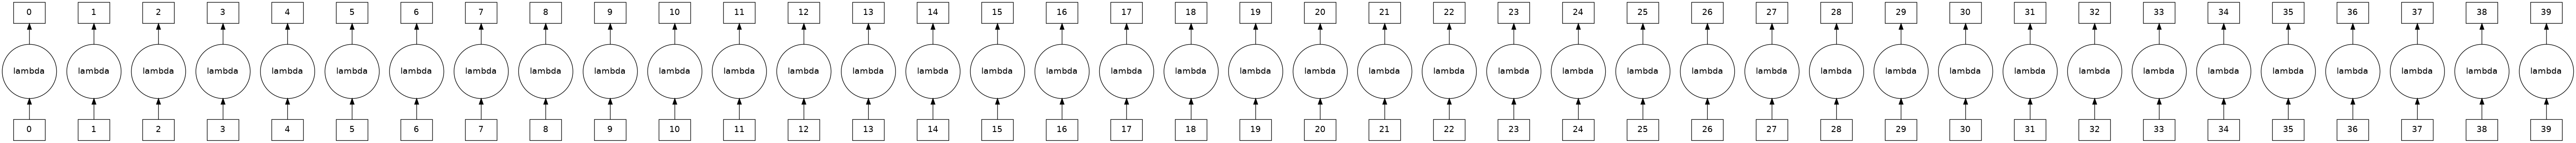

In [21]:
bag_final.visualize()

In [ ]:
%%time
bag_final.compute()

In [ ]:
client.close()